![](https://digimedsystems.com/images/run-a-cell.png)

In [ ]:
# Install fastai2 from pypi
!pip install fastai2

     |████████████████████████████████| 194kB 7.4MB/s 


In [ ]:
# fastai2 imports
from fastai2.vision.all import *

## End-to-End Training Workflow

![](https://digimedsystems.com/images/end-to-end-training-workflow-medium.png)

## 1- Download Data
Download dataset and save in `~/.fastai/data` folder

In [ ]:
path = untar_data(URLs.PETS)

## 2- Create a fastai2 DataBlock
Check out the video below for more details

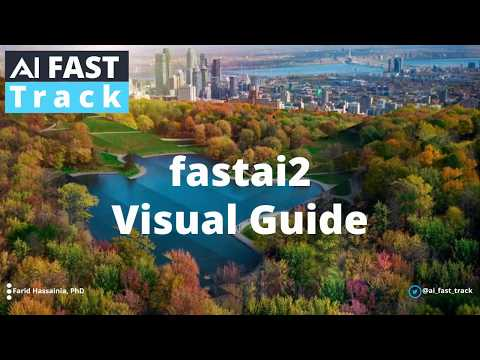

In [ ]:
from IPython.display import YouTubeVideo
# Image classification with a single label (Pet Dataset)
# Video credit: AI Fast Track.
YouTubeVideo('yoSUhpETbp8', width=600, height=400)

![](https://digimedsystems.com/images/dataBlock-oxford-pet-medium.png)

In [ ]:
# label function: if a filename starts with a capital letter then the image corresponds to a `cat` otherwise to a `dog`
def label_func(fname):
    return "cat" if fname.name[0].isupper() else "dog"

In [ ]:
# Create a DataBlock: check the animation shown in the video and/or the the illustration here above 
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   item_tfms = Resize(224),
                   batch_tfms=aug_transforms())

## 3- Create a DataLoaders Object

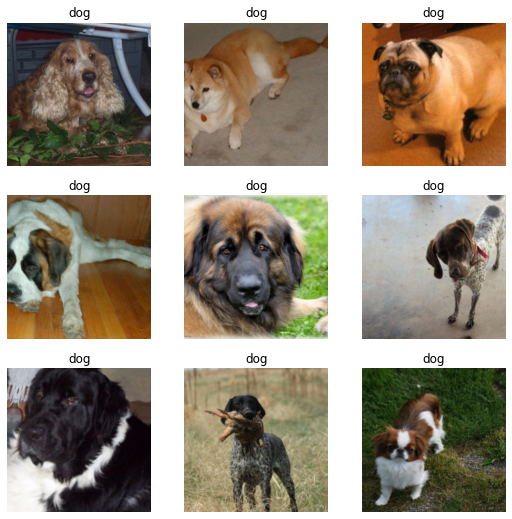

In [ ]:
# Create a DataLoaders objet
# Show a sample batch
dls = dblock.dataloaders(path/"images")
dls.show_batch()

## 4- Create a Learner Object
In this example we are using a pretrained resnet34 model.

In [ ]:
# Create a Learner object. The latter wraps:
# - A DataLoaders object: dls
# - A model: a pretrained restnet34
# - A function loss: set automatically in this case
# - A metrics: error_rate

learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


## 5- Train model
`fine_tune` method takes care of training the model by following these 2 steps:

1- Freeze the model body, and only train the head.

2- Unfreeze the body, and train the whole model.

More on these techniques soon!

In [ ]:
# Fine tune resnet model pretrained with the ImageNet dataset
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.162232,0.028495,0.008119,01:05


epoch,train_loss,valid_loss,error_rate,time
0,0.075027,0.029104,0.008796,01:17


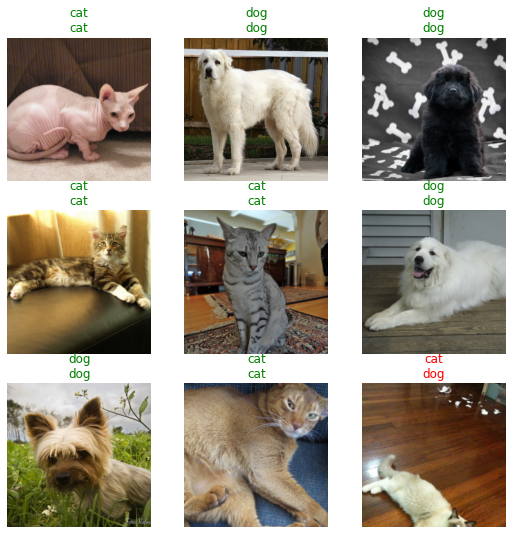

In [ ]:
# Show some images (9 by default) with Target/Prediction as a title
# Labels: Grand truth vs prediction
# When the 2 labels are green, it means the model get its prediction right
learn.show_results()

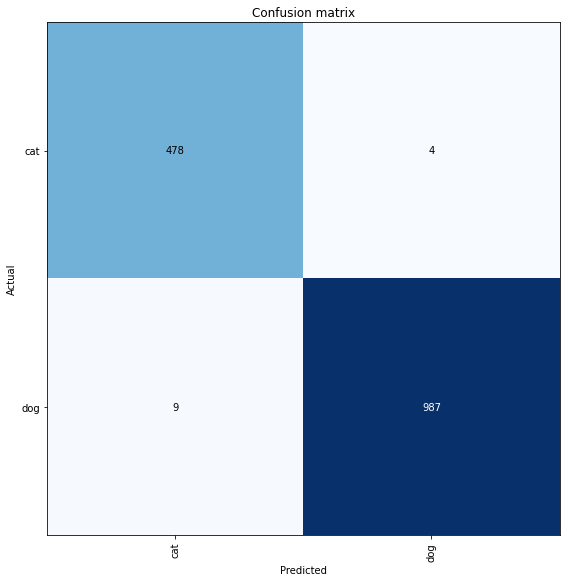

In [ ]:
# Display Confusion Matrix: Actual lables vs Predicted
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,8))

## Inference (Prediction)

In [ ]:
# Grab an image from the validation dataset
img = dls.valid.items[0]
img

Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_56.jpg')

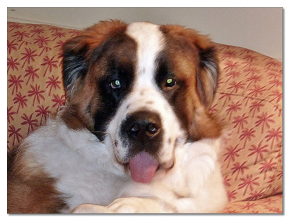

In [ ]:
# Show image
show_image(PILBase.create(img))

In [ ]:
# Predict
learn.predict(img)

('dog', tensor(1), tensor([6.9205e-05, 9.9993e-01]))

**Prediction:** **Dog** with **99.99%** confidence!

## Congratulations and Happy Learning!